Завантажую датасет. Він вже нормалізований і усі категореальні ознаки перетворені в ванхот вектори.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import *
import pandas as pd
import numpy as np

df = pd.read_csv('done_data.csv')
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_White,sex_Female,sex_Male,native-country_Mexico,native-country_United-States
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,1,0,0,1,...,0,0,1,0,0,1,1,0,0,1
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,1,0,0,1,...,1,0,0,0,0,1,0,1,0,1


Розділяю датасет на тестові та тренувальні данні за допомогою train_test_split.

In [4]:
x_train = df.drop("income", axis=1)
y_train = df["income"]

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.05, random_state=1)
x_test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_White,sex_Female,sex_Male,native-country_Mexico,native-country_United-States
9646,0.616438,0.009933,0.200000,0.000000,0.0,0.663265,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
709,0.013699,0.132991,0.400000,0.000000,0.0,0.244898,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
7385,0.109589,0.061254,0.800000,0.278283,0.0,0.500000,0,0,1,0,...,1,0,0,0,0,1,0,1,0,1
16671,0.219178,0.339055,0.533333,0.000000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
21932,0.260274,0.190357,0.400000,0.000000,0.0,0.397959,0,0,1,0,...,0,1,0,0,0,1,1,0,0,1


Пишу невелику функцію що може вивести основні данні по моделі. Після чого тестую просто базові конфігурації моделей на датасеті.

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluateModel(model):
    y_pred = model.predict(x_test)

    accuracy = model.score(x_test, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    confM = metrics.confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)
    print("Cofusion Matrix:")
    print(confM)

In [6]:
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm="ball_tree", p=2)
knn5.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree')

In [7]:
evaluateModel(knn5)

Accuracy:  0.8096992019643954
Precision:  0.7292577465431479
Recall:  0.714870916416455
F1-score:  0.7214235593175459
Cofusion Matrix:
[[ 201  171]
 [ 139 1118]]


In [53]:
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3, algorithm="ball_tree", p=2)
knn3.fit(x_train, y_train)
evaluateModel(knn3)

Accuracy:  0.8115408225905464
Precision:  0.7321625209800456
Recall:  0.723634742217774
F1-score:  0.7276757831112078
Cofusion Matrix:
[[ 209  163]
 [ 144 1113]]


In [30]:
LM1 = linear_model.LogisticRegression(max_iter=500)
LM1.fit(x_train, y_train)
evaluateModel(LM1)

Accuracy:  0.8428483732351135
Precision:  0.7820797893009801
Recall:  0.751491646778043
F1-score:  0.7646485168630639
Cofusion Matrix:
[[ 217  155]
 [ 101 1156]]


In [55]:
print(LM1.intercept_)
print(LM1.coef_)

[5.89761374]
[[-1.77581841e+00 -9.46472473e-01 -2.70085720e+00 -1.74590180e+01
  -2.48720655e+00 -2.79094732e+00 -7.13646622e-01 -3.97240125e-02
  -2.29051897e-01 -4.14860270e-01  2.54597363e-01  9.10401815e-02
   1.76636753e-01  2.66769651e-01 -2.58256526e-03 -2.30809195e-01
   2.98076997e-01  2.00989107e-01 -3.07869157e-02 -2.36986033e-01
  -4.68764521e-01 -9.03115954e-01 -7.90881108e-02 -6.21911200e-01
  -9.35036014e-01 -2.51195949e-01  1.18620466e+00 -5.56941705e-01
   1.15757514e+00  1.65239124e+00  1.29147051e+00  1.01157923e+00
  -3.92653852e-01 -4.50652217e-01 -1.15188310e+00  5.47308671e-01
   2.87833359e-01 -7.07278368e-02  4.97670600e-01 -9.14879967e-01
  -9.19995589e-01 -6.52649055e-01 -1.01335788e+00 -2.62571321e-01
   1.60641511e-01  2.23815736e-02  7.82404224e-01  1.25567237e+00
   1.56733724e-01 -1.15137686e+00 -4.51572487e-01 -2.81374653e-01
  -4.68966427e-01  1.03152383e+00  1.94932716e-01  7.04813956e-01
  -2.20571044e-01]]


In [56]:
LSVC = svm.LinearSVC()
LSVC.fit(x_train, y_train)
evaluateModel(LSVC)

Accuracy:  0.848987108655617
Precision:  0.7932353444691727
Recall:  0.7564156850668515
F1-score:  0.7718996466366734
Cofusion Matrix:
[[ 218  154]
 [  92 1165]]


In [57]:
DT = tree.DecisionTreeClassifier()
DT.fit(x_train, y_train)
evaluateModel(DT)

Accuracy:  0.8139963167587477
Precision:  0.7366831826851314
Recall:  0.744152103061565
F1-score:  0.7402470349439038
Cofusion Matrix:
[[ 229  143]
 [ 160 1097]]


In [58]:
RF = ensemble.RandomForestClassifier(n_estimators=100)
RF.fit(x_train, y_train)
evaluateModel(RF)

Accuracy:  0.8446899938612645
Precision:  0.7819135430221855
Recall:  0.7659333538635256
F1-score:  0.7733325266946973
Cofusion Matrix:
[[ 231  141]
 [ 112 1145]]


Потім тестую на машині опорних векторів якість класифікації відносно розміру навчальної вибірки. Як видно з графіку 25000 (~= розміру нашої навчальної вибірки) якраз прекрасний розмір навчальної вибірки з мінімальним перенавчанням.

In [10]:
import matplotlib.pyplot as plt

def trainSizeGraph(model, downLim=0.5, upLim=1):
    train_sizes, train_scores, test_scores = model_selection.learning_curve(model, x_train, y_train, 
                                                                            train_sizes=np.linspace(0.1, 1.0, 10), 
                                                                            cv=model_selection.KFold(5, shuffle=True))
    

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', linestyle='--', marker='o', markersize=5, label='Тренувальний набір')
    plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Тестовий набір')
    plt.xlabel('Кількість тренувальних прикладів')
    plt.ylabel('Точність')
    plt.legend(loc='lower right')
    plt.ylim([downLim, upLim])
    plt.show()
    return train_sizes, train_scores, test_scores

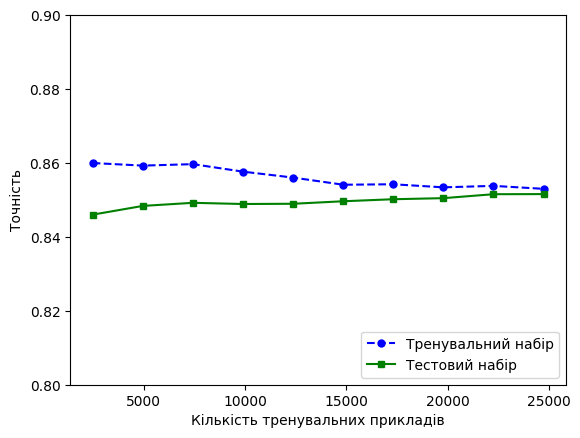

In [17]:
LSVC = svm.LinearSVC(max_iter=500)
res = trainSizeGraph(LSVC, 0.8, 0.9)

Тепер я тестую силу класифіккації на, як на мене, моделі, що найкраще себе проявила - машині опорних векторів. Як видно з графіка найкраща константа регуляризації ~2.5.

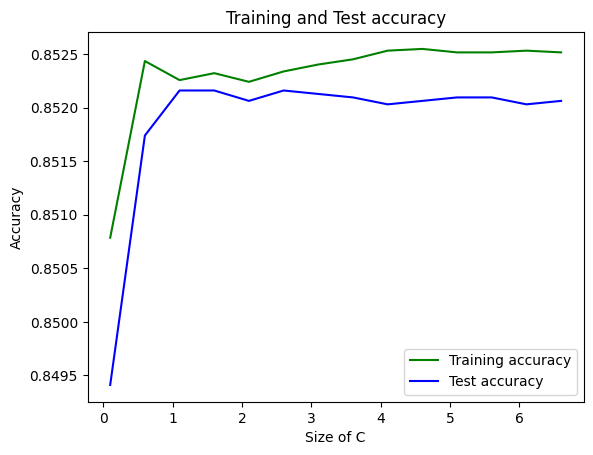

In [27]:
LSVC = svm.LinearSVC(max_iter=2500)
def trainAccur(model, param="C"):
    rng = np.arange(0.1, 7, 0.5)
    train_scores, test_scores = model_selection.validation_curve(
        model, x_train, y_train, param_name=param, param_range=rng,
        cv=model_selection.KFold(3, shuffle=True), scoring="accuracy")

    plt.plot(rng, train_scores.mean(axis=1), 'g', label='Training accuracy')
    plt.plot(rng, test_scores.mean(axis=1), 'b', label='Test accuracy')
    plt.title('Training and Test accuracy')
    plt.xlabel('Size of C')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
trainAccur(LSVC, "C")

Після чого зрозумівши що при константі регуляризації вище 4 нічого ловити вирішив вже перебрати її точніше на меншому проміжку. Отримав точність приблизно 84.65%.

In [28]:
model1 = svm.LinearSVC(max_iter=2500)

param_grid = {'C': np.arange(0.1, 4, 0.2)}

grid = model_selection.GridSearchCV(model1, 
                    param_grid=param_grid, 
                    cv=model_selection.KFold(4, shuffle=True), 
                    scoring='accuracy')

grid.fit(x_train, y_train)

model1Best = grid.best_estimator_
evaluateModel(model1Best)

Accuracy:  0.8465316144874155
Precision:  0.7892513879038372
Recall:  0.7529319680755511
F1-score:  0.7681906978014972
Cofusion Matrix:
[[ 216  156]
 [  94 1163]]


Потім вирішив по підбирати параметри до другої за якістю моделі - RandomForest. Через більшу кількість підбираємих параметрів вона виявилась трішки краще - 85.2%.

In [29]:
model2 = ensemble.RandomForestClassifier()

param_grid = {
    'n_estimators': np.arange(50, 150, 50),
    'max_depth': np.arange(5, 15, 5),
    'min_samples_leaf': np.arange(1, 10, 3)
}

grid2 = model_selection.GridSearchCV(model2, param_grid, cv=model_selection.KFold(4, shuffle=True), scoring='accuracy')

grid2.fit(x_train, y_train)
model1Best = grid2.best_estimator_
evaluateModel(model1Best)

Accuracy:  0.8520564763658687
Precision:  0.8091496312428847
Recall:  0.7404245900377242
F1-score:  0.7654141727032681
Cofusion Matrix:
[[ 199  173]
 [  68 1189]]
